In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Creative Content Generation with Gemini in Vertex AI and Imagen

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/marketing/creative_content_generation.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fuse-cases%2Fmarketing%2Fcreative_content_generation.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/marketing/creative_content_generation.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/marketing/creative_content_generation.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>

| | |
|-|-|
|Author(s) | [Thu Ya Kyaw](https://github.com/iamthuya)

**_NOTE_**: This notebook has been tested in the following environment:

* python - 3.11
* google-cloud-aiplatform - 1.54.0

## Overview
Generative AI is a game-changer for creative professionals in marketing and advertising. It can quickly create eye-catching visuals, write persuasive ad copy, and even come up with fresh ideas for campaigns.

Generative AI helps create targeted campaigns with visuals and copy that can adapt to different audiences and platforms. It can also provide personalized customer experiences by analyzing data to tailor ads to specific people, making them more likely to engage and buy. It can also automate tasks like ideation and optimizing content, saving time and effort.

In this notebook, you will be exploring how to harness the power of Generative AI do perform aforementined tasks.

### Allowlisting

Imagen's features in this sample notebook requires users to be allowlisted. To request access to use this Imagen feature, fill out the [Imagen on Vertex AI access request form](https://docs.google.com/forms/d/1cqt9padvfMgqn23W5FMPTqh7bW1KLkEOsC5G6uC-uuM/viewform).

### Objective

In this tutorial, you learn how to:

- Generate creative content from keywords
- Personalize generated contents for various audience
- Identify the most suitable visual assets
- Create visual assets to supercharge the campaign messaging

This tutorial uses the following Google Cloud AI services and resources:

- Gemini API in Vertex AI
- Imagen on Vertex AI

The step performed includes:
- Generating content using product name, product description, and product image
- Product social media post for various platforms such as Facebook, Instagram, LinkedIn, and Twitter
- Personalize generated content for various professions, different generations, and different languages
- Use outpainting feature from Imagen to generate images of different aspect ratios

## Before you begin

### Set up your Google Cloud project

**The following steps are required, regardless of your notebook environment.**

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. Enable the [Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).
1. If you are running this notebook locally, you need to install the [Cloud SDK](https://cloud.google.com/sdk).

### Installation

Install the following packages required to execute this notebook.

In [ ]:
%pip install --upgrade --user --quiet google-cloud-aiplatform

Restart the kernel after installing packages:

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>

### Authenticate your Google Cloud account

If you are running this notebook on Google Colab, you will need to authenticate your environment. To do this, run the new cell below. This step is not required if you are using Vertex AI Workbench.

In [5]:
import sys

if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

**If you don't know your project ID**, try the following:
* Run `gcloud config list`.
* Run `gcloud projects list`.
* See the support page: [Locate the project ID](https://support.google.com/googleapi/answer/7014113)

You can also change the `REGION` variable used by Vertex AI. Learn more about [Vertex AI regions](https://cloud.google.com/vertex-ai/docs/general/locations).

In [1]:
# TODO (Developer): Replace with your project ID

PROJECT_ID = "YOUR_PROJECT_ID"  # @param {type:"string"}
REGION = "us-central1"  # @param {type: "string"}

Initialize the Vertex AI Python SDK for your project:

In [2]:
import vertexai

vertexai.init(project=PROJECT_ID, location=REGION)

### Import libraries

In [3]:
from IPython.display import Markdown, display
from vertexai.generative_models import GenerativeModel, Part

Initialize the Gemini model from Vertex AI:

In [4]:
model = GenerativeModel("gemini-1.5-flash")

## Content generation

In this section, you will generate a few social media posts for a new product called **GShoe**.

### Generate with product name

Try generating with just a product name.

In [5]:
product_name = "GShoe"

prompt = f"""
  Generate a few social media posts about a new product, {product_name}
"""

print(f"Prompt: {prompt}")

display(Markdown(model.generate_content(prompt).text))

Prompt: 
  Generate a few social media posts about a new product, GShoe



## GShoe Social Media Posts:

**Post 1:** (Image: Close-up of GShoe with sleek design and unique feature highlighted)

**Caption:**  Introducing GShoe - the future of footwear! 👟✨  Get ready to experience unparalleled comfort, style, and technology.  Stay tuned for more! #GShoe #Innovation #Footwear #ComingSoon

**Post 2:** (Video: Short clip showcasing GShoe's unique feature in action)

**Caption:**  Tired of clunky, uncomfortable shoes? 🙅‍♀️ GShoe is here to revolutionize your walk!  Discover how our [unique feature] redefines comfort and performance. #GShoe #ComfortRedefined #TechShoe #GetReady

**Post 3:** (Image: Group of people wearing GShoe, looking stylish and confident)

**Caption:**  Step up your style game with GShoe! ⚡️ Our shoes are designed to turn heads and make a statement.  Find your perfect fit and conquer the world. #GShoe #StyleIcon #FashionForward #ConfidenceBoost

**Post 4:** (Interactive post: Quiz with questions about footwear preferences)

**Caption:**  What's your shoe style? 🤔 Take our quiz to discover your perfect GShoe match!  Tell us your preferences and we'll recommend the ideal shoe for you.  Link in bio!  #GShoe #ShoeQuiz #PersonalizedStyle #FindYourFit

**Post 5:** (Image: GShoe packaging with a sleek, premium design)

**Caption:**  Unboxing is just the beginning... 🎁 Get ready to experience the GShoe difference.  Pre-order your pair today and be one of the first to own this revolutionary footwear! #GShoe #PreOrderNow #LimitedEdition #ExperienceTheDifference

**Bonus Tip:**  Use relevant hashtags to reach a wider audience and engage with your followers.  Encourage comments and questions to create a buzz around your new product.  Don't forget to run contests and giveaways to generate excitement! 


### Generate with product description

Adding a product description can further improve the output quality.

In [6]:
product_description = """
  GShoe's design is focused on comfort, durability, and style. It includes the following features:
  - Breathable and flexible upper: GShoe's upper is made from breathable and flexible materials to allow for maximum comfort and movement. It's designed to accommodate a range of foot shapes and sizes and provide adequate support and stability.
  - Cushioned insole: GShoe's insole is cushioned to provide shock absorption and support. It helps reduce foot fatigue and prevent injuries caused by impact and stress.
  - Durable outsole: GShoe's outsole is made from durable rubber to provide traction and protection. It's designed to withstand the wear and tear of daily use and provide grip on a variety of surfaces.
  - Stylish design: GShoe's design is sleek and modern, with a range of color and style options to suit any taste. It's designed to look good both on and off the track and complement a variety of workout gear.
"""

prompt = f"""
  Generate a few social media posts about a new product, {product_name}.\n
  This is the product description: {product_description}
"""

print(f"Prompt: {prompt}")

display(Markdown(model.generate_content(prompt).text))

Prompt: 
  Generate a few social media posts about a new product, GShoe.

  This is the product description: 
  GShoe's design is focused on comfort, durability, and style. It includes the following features:
  - Breathable and flexible upper: GShoe's upper is made from breathable and flexible materials to allow for maximum comfort and movement. It's designed to accommodate a range of foot shapes and sizes and provide adequate support and stability.
  - Cushioned insole: GShoe's insole is cushioned to provide shock absorption and support. It helps reduce foot fatigue and prevent injuries caused by impact and stress.
  - Durable outsole: GShoe's outsole is made from durable rubber to provide traction and protection. It's designed to withstand the wear and tear of daily use and provide grip on a variety of surfaces.
  - Stylish design: GShoe's design is sleek and modern, with a range of color and style options to suit any taste. It's designed to look good both on and off the track and co

## GShoe Social Media Posts:

**Post 1 (Image: Close-up of the GShoe upper):**

**Caption:**  Tired of shoes that pinch and restrict your movement? 👟  Introducing GShoe, the shoe designed for ultimate comfort and flexibility. Breathable materials and a cushioned insole will keep your feet happy all day long. 👣  Learn more about GShoe and find your perfect fit at [link to website].  #GShoe #ComfortFirst #ActiveLifestyle 

**Post 2 (Image: Person wearing GShoe running outdoors):**

**Caption:**  Ready to conquer your next workout? 💪  GShoe offers the support and durability you need to push your limits.  Its durable outsole provides superior grip on any surface, while the stylish design keeps you looking good while you're at it.  Shop GShoe now and feel the difference! [link to website] #GShoe #WorkoutReady #StyleAndPerformance

**Post 3 (Image: GShoe in various color options):**

**Caption:**  Express your personal style with GShoe!  Our wide range of colors and designs allow you to create the perfect look for any occasion.  Whether you're hitting the gym or running errands, GShoe is the ultimate choice for comfort, style, and performance.  Shop our collection now!  #GShoe #StyleForAll #FindYourFit 

**Post 4 (Video: Short clip showcasing GShoe features):**

**Caption:**  See what makes GShoe the ultimate choice for comfort and performance!  Breathable, flexible, cushioned, and durable, GShoe has it all.  Visit our website to learn more and find your perfect pair! [link to website] #GShoe #ComfortAndDurability #YourNextFavoriteShoe

**Post 5 (Interactive):**

**Caption:**  What are your must-haves in a great shoe? 🤔  Tell us in the comments!  Comfort, style, durability, or something else?  We're always looking for ways to improve GShoe and make it even better for you.  #GShoe #CustomerFeedback #ShoeEnthusiasts 


### Generate with product image

Since Gemini is [multimodal](https://cloud.google.com/use-cases/multimodal-ai?hl=en), you can also provide a visual asset (e.g. a product image) to generate marketing messages based on that. Here you will generate marketing messages for based on this product image:

<a href="https://storage.googleapis.com/github-repo/use-cases/marketing/gshoe-images/gshoe-01.jpg"><img src="https://storage.googleapis.com/github-repo/use-cases/marketing/gshoe-images/gshoe-01.jpg" width="200" height="200" /></a>

In [7]:
# prepare product image

product_image_url = "https://storage.googleapis.com/github-repo/use-cases/marketing/gshoe-images/gshoe-01.jpg"
product_image_gcs_uri = "gs://github-repo/use-cases/marketing/gshoe-images/gshoe-01.jpg"
product_image_markdown = f"<img src='{product_image_url}' width='200' height='200' />"

product_image = Part.from_uri(
    product_image_gcs_uri,
    mime_type="image/jpeg",
)

In [8]:
prompt = f"""
  Generate a few social media posts about a new product, {product_name}.\n
  This is the product description: {product_description}
  This is the product image: """

content = [prompt, product_image]

print(f"Prompt: {prompt}")
display(Markdown(product_image_markdown))

display(Markdown(model.generate_content(content).text))

Prompt: 
  Generate a few social media posts about a new product, GShoe.

  This is the product description: 
  GShoe's design is focused on comfort, durability, and style. It includes the following features:
  - Breathable and flexible upper: GShoe's upper is made from breathable and flexible materials to allow for maximum comfort and movement. It's designed to accommodate a range of foot shapes and sizes and provide adequate support and stability.
  - Cushioned insole: GShoe's insole is cushioned to provide shock absorption and support. It helps reduce foot fatigue and prevent injuries caused by impact and stress.
  - Durable outsole: GShoe's outsole is made from durable rubber to provide traction and protection. It's designed to withstand the wear and tear of daily use and provide grip on a variety of surfaces.
  - Stylish design: GShoe's design is sleek and modern, with a range of color and style options to suit any taste. It's designed to look good both on and off the track and co

<img src='https://storage.googleapis.com/github-repo/use-cases/marketing/gshoe-images/gshoe-01.jpg' width='200' height='200' />

## GShoe Social Media Posts:

**Post 1 (Image: Close-up of the GShoe with the "GShoe" logo prominent)**

**Caption:** 👟 Step up your style game with GShoe!  Our new sneakers are designed for comfort, durability, and style.  With a breathable upper, cushioned insole, and durable outsole, GShoe is the perfect choice for any occasion.  Available in a range of colors and styles, there's a GShoe for everyone.  Shop now!  #GShoe #Sneakers #Comfort #Style #Durability

**Post 2 (Image: Person wearing GShoe walking or exercising)**

**Caption:** 💪  Ready to take your workouts to the next level?  GShoe's breathable upper, cushioned insole, and durable outsole provide support and comfort for every step.  Get the performance and style you need with GShoe.  #GShoe #Workout #Fitness #Activewear

**Post 3 (Image: GShoe in a different colorway and style)**

**Caption:** 🎨  Express your unique style with GShoe!  Choose from a variety of colors and styles to create the perfect look.  From classic to bold, GShoe has a pair for you.  #GShoe #Style #Fashion #Sneakers

**Post 4 (Image: GShoe displayed with a quote about comfort or style)**

**Caption:** "Style is a way to say who you are without having to speak." - Rachel Zoe  💯  Elevate your style with GShoe.  Our sneakers are designed with both comfort and style in mind.  Shop now and find your perfect pair! #GShoe #Style #Quote #Comfort

**Post 5 (Image: GShoe being worn in a casual setting, like a coffee shop or walking in the park)**

**Caption:** ☕️  From the gym to the streets, GShoe is the perfect all-day shoe.  Our sneakers are stylish enough for any occasion and comfortable enough to wear all day long.  Get your GShoe today! #GShoe #Style #Comfort #EverydayWear 


### Generate for various platforms

So far, the generated posts are too general. Fortunately, with Gemini, you can target for specific platforms. Here you will generate the messages targeted to various platforms.

In [9]:
platforms = "LinkedIn, Facebook, Twitter, Instagram"

prompt = f"""
  Generate a few social media posts about a new product, {product_name}
  for platforms: '{platforms}'\n
  This is the product description: {product_description}
  This is the product image: """

content = [prompt, product_image]

print(f"Prompt: {prompt}")
display(Markdown(product_image_markdown))

social_media_posts = model.generate_content(content).text
display(Markdown(social_media_posts))

Prompt: 
  Generate a few social media posts about a new product, GShoe
  for platforms: 'LinkedIn, Facebook, Twitter, Instagram'

  This is the product description: 
  GShoe's design is focused on comfort, durability, and style. It includes the following features:
  - Breathable and flexible upper: GShoe's upper is made from breathable and flexible materials to allow for maximum comfort and movement. It's designed to accommodate a range of foot shapes and sizes and provide adequate support and stability.
  - Cushioned insole: GShoe's insole is cushioned to provide shock absorption and support. It helps reduce foot fatigue and prevent injuries caused by impact and stress.
  - Durable outsole: GShoe's outsole is made from durable rubber to provide traction and protection. It's designed to withstand the wear and tear of daily use and provide grip on a variety of surfaces.
  - Stylish design: GShoe's design is sleek and modern, with a range of color and style options to suit any taste. It

<img src='https://storage.googleapis.com/github-repo/use-cases/marketing/gshoe-images/gshoe-01.jpg' width='200' height='200' />

## GShoe Social Media Posts:

**LinkedIn:**

**Headline:** Introducing GShoe: The Perfect Blend of Comfort, Durability, and Style. 

**Body:** 

Looking for a shoe that can keep up with your active lifestyle? GShoe is here to elevate your performance with its breathable and flexible upper, cushioned insole, and durable outsole.  Designed for both comfort and style, GShoe is the perfect choice for anyone who wants to look and feel their best. 

[Link to website or product page] 

**#gshoe #comfort #style #durability #performance #activelifestyle #newproduct #innovation**

---

**Facebook:**

**Image:** GShoe product image

**Caption:**

Ready to step up your shoe game?  Introducing GShoe! 👟  

GShoe is crafted with the highest quality materials and features breathable comfort, durable construction, and a sleek design that will turn heads.  

Click the link below to learn more and find your perfect pair! 👇

[Link to website or product page]

**#gshoe #shoes #comfort #style #durability #newproduct #shopnow**

---

**Twitter:**

**Tweet:**

Introducing GShoe: The shoe that delivers on comfort, style, and durability.  👟  

Get ready to feel the difference! #gshoe #comfort #style #durability

[Link to website or product page]

**Image:** GShoe product image

---

**Instagram:**

**Image:**  GShoe product image (close-up shot of the shoe)

**Caption:**

Comfort meets style with GShoe.  🤩  

Experience the perfect blend of breathability, cushioning, and durability.  Get ready to elevate your everyday look!

#gshoe #shoes #comfort #style #newproduct #fashion #lifestyle 

**Call to Action:**

Shop now and get ready to experience the GShoe difference! ➡️  [Link to website or product page]

## Content personalization

In this section, you will use Gemini model to produce the marketing messages for a specific target segment or a customer profile

### Generate for various professions

Here you will generate for students and working professionals. Observe the responses to see how the messaging has changed to fit the audience profile.

In [11]:
# make it suitable for students

prompt = f"""
  Reference to these social media posts: \n{social_media_posts}
  Make the posts suitable for students
  """

display(Markdown(model.generate_content(prompt).text))

Here are the social media posts tailored for a student audience:

**LinkedIn:**

**Headline:**  Level Up Your Style Game with GShoe!

**Body:** 

Tired of shoes that feel like bricks? 🧱 GShoe is here to help you conquer your day in comfort and style!  With breathable fabric, a cushy insole, and a tough outsole, GShoe can handle your hectic schedule without sacrificing comfort.  

Check out our website to see how GShoe can help you step up your style! 😎

[Link to website or product page]

**#gshoe #studentlife #comfort #style #durability #college #newproduct #innovation**

---

**Facebook:**

**Image:** GShoe product image (students wearing them)

**Caption:**

Finals week got you feeling stressed? 🤯 GShoe is here to make life a little easier! 😎  

We're all about comfort, style, and durability - perfect for tackling exams and late-night study sessions!  

Click the link to check out our new collection and find your perfect pair! 👇

[Link to website or product page]

**#gshoe #shoes #comfort #style #durability #newproduct #studentlife #shopnow**

---

**Twitter:**

**Tweet:**

Class is in session, and so is GShoe!  🎓👟  

Get ready to conquer your day in style and comfort!  #gshoe #studentlife #comfort #style #durability

[Link to website or product page]

**Image:** GShoe product image (students hanging out)

---

**Instagram:**

**Image:**  GShoe product image (students wearing them in a fun setting)

**Caption:**

Study hard, play harder.  💪  

GShoe has your back (and feet) with breathable comfort, amazing style, and lasting durability.  Let's take on the semester! 

#gshoe #shoes #comfort #style #newproduct #studentlife #fashion #lifestyle 

**Call to Action:**

Shop now and find your perfect GShoe match! ➡️  [Link to website or product page] 


In [12]:
# make it suitable for working adults

prompt = f"""
  Reference to these social media posts: \n{social_media_posts}
  Make the posts suitable for working adults
  """

display(Markdown(model.generate_content(prompt).text))

Here are the social media posts, tailored for a working adult audience:

**LinkedIn:**

**Headline:** GShoe: Elevating Your Performance, Both On and Off the Clock. 

**Body:** 

Striving for success in both your career and personal life demands footwear that can keep up.  GShoe is engineered to deliver the perfect balance of comfort, durability, and style – a winning combination for the modern professional. With its breathable upper, cushioned insole, and long-lasting outsole, GShoe empowers you to conquer your workday and unwind in style.

[Link to website or product page] 

**#gshoe #comfort #style #durability #performance #worklifebalance #newproduct #innovation**

---

**Facebook:**

**Image:** GShoe product image (focus on sleek, professional design)

**Caption:**

Looking for footwear that seamlessly transitions from the boardroom to your after-work activities? GShoe is the answer.  👟 

Crafted with premium materials, GShoe offers exceptional comfort, durability, and a sophisticated aesthetic that complements any professional wardrobe. 

Click the link below to discover your perfect pair and elevate your everyday style. 👇

[Link to website or product page]

**#gshoe #shoes #comfort #style #durability #newproduct #professionalstyle #workwear**

---

**Twitter:**

**Tweet:**

Power through your workday and beyond with GShoe.  👟  

The perfect blend of comfort, durability, and style for the modern professional. #gshoe #comfort #style #durability 

[Link to website or product page]

**Image:** GShoe product image (emphasizing versatility)

---

**Instagram:**

**Image:**  GShoe product image (focus on minimalist, professional design)

**Caption:**

Achieve peak performance in both work and life with GShoe.  🤩  

Combining breathable comfort, premium cushioning, and enduring durability, GShoe is the ideal companion for your busy schedule.  

#gshoe #shoes #comfort #style #newproduct #professionalstyle #lifestyle #workwear

**Call to Action:**

Elevate your everyday look with GShoe. Shop now! ➡️  [Link to website or product page] 


In [13]:
# make it suitable for retiree

prompt = f"""
  Reference to these social media posts: \n{social_media_posts}
  Make the posts suitable for retiree
  """

display(Markdown(model.generate_content(prompt).text))

Here are the revised social media posts tailored for a retiree audience:

**LinkedIn:**

**Headline:** GShoe: Comfort & Style for Your Active Retirement 

**Body:** 

Enjoying your retirement to the fullest means staying active and comfortable. GShoe is here to support your adventures with its breathable and flexible upper, cushioned insole, and durable outsole.  

Designed for both comfort and style, GShoe is the perfect choice for anyone who wants to look and feel their best while exploring new interests or simply enjoying daily walks. 

[Link to website or product page] 

**#gshoe #comfort #style #durability #retirement #activelifestyle #newproduct #innovation**

---

**Facebook:**

**Image:** GShoe product image

**Caption:**

Looking for shoes that are as comfortable as they are stylish?  Introducing GShoe! 👟  

GShoe is crafted with the highest quality materials and features breathable comfort, durable construction, and a sleek design.  Perfect for your outings, walks, or simply relaxing at home.

Click the link below to learn more and find your perfect pair! 👇

[Link to website or product page]

**#gshoe #shoes #comfort #style #durability #newproduct #shopnow #retirement**

---

**Twitter:**

**Tweet:**

Introducing GShoe: The shoe that delivers on comfort, style, and durability. Perfect for active retirees! 👟  

Get ready to feel the difference! #gshoe #comfort #style #durability #retirement

[Link to website or product page]

**Image:** GShoe product image

---

**Instagram:**

**Image:**  GShoe product image (close-up shot of the shoe)

**Caption:**

Comfort meets style with GShoe.  🤩  

Experience the perfect blend of breathability, cushioning, and durability.  Enjoy your retirement in style!

#gshoe #shoes #comfort #style #newproduct #fashion #lifestyle #retirement 

**Call to Action:**

Shop now and get ready to experience the GShoe difference! ➡️  [Link to website or product page]

**Changes Made:**

* **Focus on comfort and ease:** The posts emphasize the comfort and durability of the shoes, appealing to retirees who value these qualities.
* **Highlight active lifestyle:**  While not pushing a super-athletic image, the posts encourage staying active and mention activities relevant to retirees like walks, outings, and exploring.
* **Use relatable language:** The language is more approachable and avoids overly youthful or trendy terms.
* **Add relevant hashtags:** Hashtags like #retirement, #activelifestyle, and #comfort are added to target a retiree audience. 


### Generate for different generations

Here you will generate the marketing messaging for millennial and baby boomer generations. Observe how Gemini is able to make the responses more relevant to the target audience.

In [14]:
# make the posts appealing to millennial generation

prompt = f"""
  Reference to these social media posts: \n{social_media_posts}
  Make the posts appealing to millennial generation
  """

display(Markdown(model.generate_content(prompt).text))

Here are the revised social media posts tailored for millennials:

**LinkedIn:**

**Headline:**  Stop Settling for "Okay" Shoes. Introducing GShoe: Built for Your Life. 

**Body:** 

Millennials, you're always on the go. Work, workouts, weekend adventures - you need a shoe that keeps up. Introducing GShoe. Forget bulky, boring footwear. GShoe is breathable, flexible, and built to last. It's your new go-to for comfort, style, and serious performance. 

[Link to website or product page] 

**#gshoe #millennials #comfort #style #durability #performance #activelifestyle #newproduct #innovation**

---

**Facebook:**

**Image:**  Fun, lifestyle image of a millennial wearing GShoes - maybe at a coffee shop, hiking, or at a music festival.

**Caption:**

Tired of shoes that make you feel like you're stuck in the past? Introducing GShoe - the future of comfort and style.  👟  

GShoe is designed for your active life. Breathable, durable, and with a sleek design, it's the perfect fit for your everyday adventures.  

Click below to find your perfect GShoe match.  👇

[Link to website or product page]

**#gshoe #shoes #millennials #comfort #style #durability #newproduct #shopnow**

---

**Twitter:**

**Tweet:**

No more sacrificing comfort for style! GShoe is here to level up your shoe game. 👟  

#gshoe #millennials #comfort #style #durability #newproduct

[Link to website or product page]

**Image:** GShoe product image with a creative, modern filter.

---

**Instagram:**

**Image:**  A cool, minimalist photo of GShoe with a vibrant color scheme.

**Caption:**

Live your life in style and comfort.  🤩  

GShoe is built for the modern millennial. Breathable, cushioned, and durable - it's the perfect blend of performance and fashion.  

#gshoe #shoes #comfort #style #newproduct #fashion #lifestyle #millennialstyle

**Call to Action:**

Ready to upgrade your shoe game? Shop now and experience the GShoe difference! ➡️  [Link to website or product page] 

**Here's how these posts are more appealing to millennials:**

* **More relatable language:** The language is more casual and conversational, reflecting how millennials communicate.  
* **Focus on lifestyle:** Instead of just emphasizing features, the posts focus on how GShoe fits into a millennial's lifestyle.
* **Visual appeal:** The images are more modern and visually engaging, using trendy colors and filters. 
* **Emphasize individuality:**  The posts speak directly to millennials and their desire to express themselves through their style.
* **Strong calls to action:**  The posts encourage engagement and make it clear how to purchase GShoe. 


In [15]:
# make the posts appealing to baby boomer generation

prompt = f"""
  Reference to these social media posts: \n{social_media_posts}
  Make the posts appealing to baby boomer generation
  """

display(Markdown(model.generate_content(prompt).text))

Here are the social media posts, revised to appeal to the Baby Boomer generation:

**LinkedIn:**

**Headline:** GShoe: Comfort, Quality, and Style for the Modern Life

**Body:** 

As active and stylish Baby Boomers, you deserve a shoe that keeps up with your busy life.  Introducing GShoe, designed with your comfort and well-being in mind.  

GShoe offers a breathable and flexible fit, cushioned support, and a durable outsole, allowing you to navigate your day with ease.  We understand the importance of quality and style, which is why GShoe combines both, allowing you to look and feel your best. 

[Link to website or product page] 

**#gshoe #comfort #style #durability #quality #activelifestyle #newproduct #innovation**

---

**Facebook:**

**Image:** GShoe product image, showcasing the classic and elegant design.

**Caption:**

Remember when shoes were made to last?  GShoe brings back that quality and craftsmanship.  

GShoe is crafted with premium materials and features breathable comfort, durable construction, and a timeless design that will never go out of style.  

Click the link below to learn more and find your perfect pair! 👇

[Link to website or product page]

**#gshoe #shoes #comfort #style #durability #quality #newproduct #shopnow**

---

**Twitter:**

**Tweet:**

Looking for shoes that offer comfort, style, and quality?  Look no further than GShoe. 👟  

Experience the difference of a shoe designed with you in mind.  #gshoe #comfort #style #durability #quality

[Link to website or product page]

**Image:** GShoe product image, showcasing the classic and elegant design.

---

**Instagram:**

**Image:**  GShoe product image (close-up shot of the shoe), showcasing the high-quality materials and craftsmanship.

**Caption:**

Style that lasts, comfort you can count on.  That's GShoe.  🤩  

Experience a shoe that blends classic design with modern comfort, thanks to breathable materials, cushioning, and long-lasting construction.  

#gshoe #shoes #comfort #style #quality #newproduct #fashion #lifestyle 

**Call to Action:**

Step up your shoe game with GShoe! ➡️  [Link to website or product page]

**Key Changes Made to Appeal to Baby Boomers:**

* **Emphasis on Quality and Durability:** Instead of just "comfort," the messaging highlights the **quality** and **durability** of the shoe, appealing to the Baby Boomer value of lasting products.
* **Timeless Design:** Instead of focusing on trends, the messaging highlights the **classic and elegant design** of the shoe, appealing to the Baby Boomer preference for timeless styles.
* **Focus on Comfort and Ease:** The messaging emphasizes the **comfort and ease of movement** that GShoe provides, addressing the concerns of Baby Boomers about their comfort and mobility.
* **Use of Familiar Language:**  The messaging uses a tone and language familiar to the Baby Boomer generation, using phrases like "quality and craftsmanship" and "timeless design."
* **Emphasis on Value:**  The messaging emphasizes the value of GShoe, showcasing its high-quality materials and construction, which are important considerations for the Baby Boomer generation. 


### Generate for different countries and languages

In [16]:
# make it suitable for Indonesia

prompt = f"""
  Reference to these social media posts: \n{social_media_posts}
  Make the posts suitable for Indonesia
  """

display(Markdown(model.generate_content(prompt).text))

## GShoe Social Media Posts (Indonesia):

**LinkedIn:**

**Headline:** Memperkenalkan GShoe: Perpaduan Sempurna Antara Kenyamanan, Ketahanan, dan Gaya.

**Body:**

Mencari sepatu yang dapat mendukung gaya hidup aktif Anda? GShoe hadir untuk meningkatkan performa Anda dengan bagian atas yang bernapas dan fleksibel, sol dalam yang empuk, dan sol luar yang tahan lama.  Didesain untuk kenyamanan dan gaya, GShoe adalah pilihan sempurna bagi siapa pun yang ingin tampil dan merasa terbaik.

[Link ke situs web atau halaman produk]

**#gshoe #kenyamanan #gaya #ketahanan #performa #gayahi dupa  #produkbaru #inovasi**

---

**Facebook:**

**Image:** Gambar produk GShoe

**Caption:**

Siap untuk meningkatkan permainan sepatu Anda?  Perkenalkan GShoe! 👟 

GShoe dibuat dengan bahan berkualitas tinggi dan menampilkan kenyamanan yang bernapas, konstruksi yang tahan lama, dan desain yang elegan yang akan menarik perhatian. 

Klik tautan di bawah ini untuk mempelajari lebih lanjut dan temukan pasangan yang sempurna untuk Anda! 👇

[Link ke situs web atau halaman produk]

**#gshoe #sepatu #kenyamanan #gaya #ketahanan #produkbaru #belanjasekarang**

---

**Twitter:**

**Tweet:**

Perkenalkan GShoe: Sepatu yang menghadirkan kenyamanan, gaya, dan ketahanan. 👟 

Siap rasakan perbedaannya! #gshoe #kenyamanan #gaya #ketahanan

[Link ke situs web atau halaman produk]

**Image:** Gambar produk GShoe

---

**Instagram:**

**Image:**  Gambar produk GShoe (potret close-up sepatu)

**Caption:**

Kenyamanan bertemu gaya dengan GShoe. 🤩  

Rasakan perpaduan sempurna antara pernapasan, bantalan, dan ketahanan.  Siap tingkatkan penampilan sehari-hari Anda!

#gshoe #sepatu #kenyamanan #gaya #produkbaru #fashion #gaya hidup

**Ajakan bertindak:**

Belanja sekarang dan siap rasakan perbedaan GShoe! ➡️  [Link ke situs web atau halaman produk]


In [18]:
# make it suitable for Japanese speaking audience

prompt = f"""
  Reference to these social media posts: \n{social_media_posts}
  Make the posts suitable for Japanese speaking audience
  """

display(Markdown(model.generate_content(prompt).text))

## GShoe ソーシャルメディア投稿 (日本語版)

**LinkedIn:**

**見出し:** GShoeのご紹介: 快適性、耐久性、そしてスタイルの完璧な融合

**本文:**

アクティブなライフスタイルに合わせた靴をお探しですか？ GShoeは、通気性と柔軟性に優れたアッパー、クッション性の高いインソール、耐久性に優れたアウトソールで、あなたのパフォーマンスを向上させます。 快適性とスタイルを兼ね備えたGShoeは、最高の見た目と履き心地を求めるすべての人に最適な選択肢です。

[ウェブサイトまたは製品ページへのリンク]

**#gshoe #快適性 #スタイル #耐久性 #パフォーマンス #アクティブライフスタイル #新製品 #イノベーション**

---

**Facebook:**

**画像:** GShoe 製品画像

**キャプション:**

あなたのシューズゲームをレベルアップする準備はできていますか？ GShoeをご紹介します！👟

GShoeは、最高品質の素材で作られており、通気性のある快適さ、耐久性のある構造、そして人目を引くスタイリッシュなデザインを備えています。

下のリンクをクリックして、詳細をご覧ください。あなたにぴったりの一足を見つけましょう！ 👇

[ウェブサイトまたは製品ページへのリンク]

**#gshoe #シューズ #快適性 #スタイル #耐久性 #新製品 #今すぐ購入**

---

**Twitter:**

**ツイート:**

GShoeのご紹介: 快適性、スタイル、耐久性を兼ね備えたシューズ。 👟

違いを感じてください！ #gshoe #快適性 #スタイル #耐久性

[ウェブサイトまたは製品ページへのリンク]

**画像:** GShoe 製品画像

---

**Instagram:**

**画像:** GShoe 製品画像 (シューズのクローズアップ写真)

**キャプション:**

快適さとスタイルが融合したGShoe。 🤩

通気性、クッション性、耐久性を完璧に融合させたシューズです。 毎日のスタイルを格上げしましょう！

#gshoe #シューズ #快適性 #スタイル #新製品 #ファッション #ライフスタイル

**行動喚起:**

今すぐ購入して、GShoeの素晴らしさを体験しましょう！ ➡️ [ウェブサイトまたは製品ページへのリンク] 


## Creating visual asset for various platforms

You can also create more visual assets for various platform using Imagen. For example, you might want to use 16:9 aspect ratio image instead of 1:1 aspect ratio image that you just used. Here you will use [outpainting feature](https://cloud.google.com/vertex-ai/generative-ai/docs/image/edit-outpainting#generativeaionvertexai_imagen_edit_image_outpainting_mask-python_vertex_ai_sdk) from Imagen to expend the 1:1 aspect ratio to 16:9.


Note: To complete the following part, you need to be allowlisted for Imagen's features. To request access to use the Imagen features, fill out the [Imagen on Vertex AI access request form](https://docs.google.com/forms/d/1cqt9padvfMgqn23W5FMPTqh7bW1KLkEOsC5G6uC-uuM/viewform).

In [19]:
# initialize and select image generation model

from vertexai.preview.vision_models import Image, ImageGenerationModel

imagen_model = ImageGenerationModel.from_pretrained("imagegeneration@006")

In [20]:
import shutil

# helper function to download image from a URL
import requests


def download_image(image_url, save_path):
    """Downloads an image from a URL and saves it to the specified path."""
    try:
        response = requests.get(
            image_url, stream=True
        )  # Stream for efficient downloading
        response.raise_for_status()  # Check for HTTP errors

        with open(save_path, "wb") as file:
            shutil.copyfileobj(response.raw, file)

    except requests.exceptions.RequestException as error:
        print(f"Error downloading image: {error}")


from PIL import Image as PILImage


# helper function to expend the image to 16:9 ratio
def make_16_9_image_and_mask(image_path):
    """
    Expands a 1:1 aspect ratio image into 16:9
    """

    with PILImage.open(image_path) as img:
        width, height = img.size

        # ensure input image is 1:1 aspect ratio
        if width != height:
            raise ValueError("Image is not 1:1 aspect ratio")

        # Calculate the new dimensions
        new_width = width * 16 // 9
        pad_width = (new_width - width) // 2  # Padding on each side

        # Create a new black image with the 16:9 dimensions
        new_img = PILImage.new("RGB", (new_width, height), (0, 0, 0))

        # Paste the original image in the center
        new_img.paste(img, (pad_width, 0))

        # Save the expanded image
        output_img_path = f"{image_path.split('.')[0]}_16_9.jpg"
        new_img.save(output_img_path)

        # Create a new white mask with the 16:9 dimensions
        white_mask = PILImage.new("RGB", (new_width, height), (255, 255, 255))

        # Paste the black mask with original image's dimensions in the center
        black_mask = PILImage.new("RGB", (width, height), (0, 0, 0))
        white_mask.paste(black_mask, (pad_width, 0))

        # Save the expanded image
        output_mask_path = f"{image_path.split('.')[0]}_16_9_mask.jpg"
        white_mask.save(output_mask_path)

        return output_img_path, output_mask_path

In [21]:
# download and prepare the image and its mask


gshoe_image_url = "https://storage.googleapis.com/github-repo/use-cases/marketing/gshoe-images/gshoe-01.jpg"
gshoe_image_path = "gshoe-01.jpg"  # Choose where to save the image
download_image(gshoe_image_url, gshoe_image_path)

image_path, mask_path = make_16_9_image_and_mask(gshoe_image_path)
base_img = Image.load_from_file(location=image_path)
mask_img = Image.load_from_file(location=mask_path)

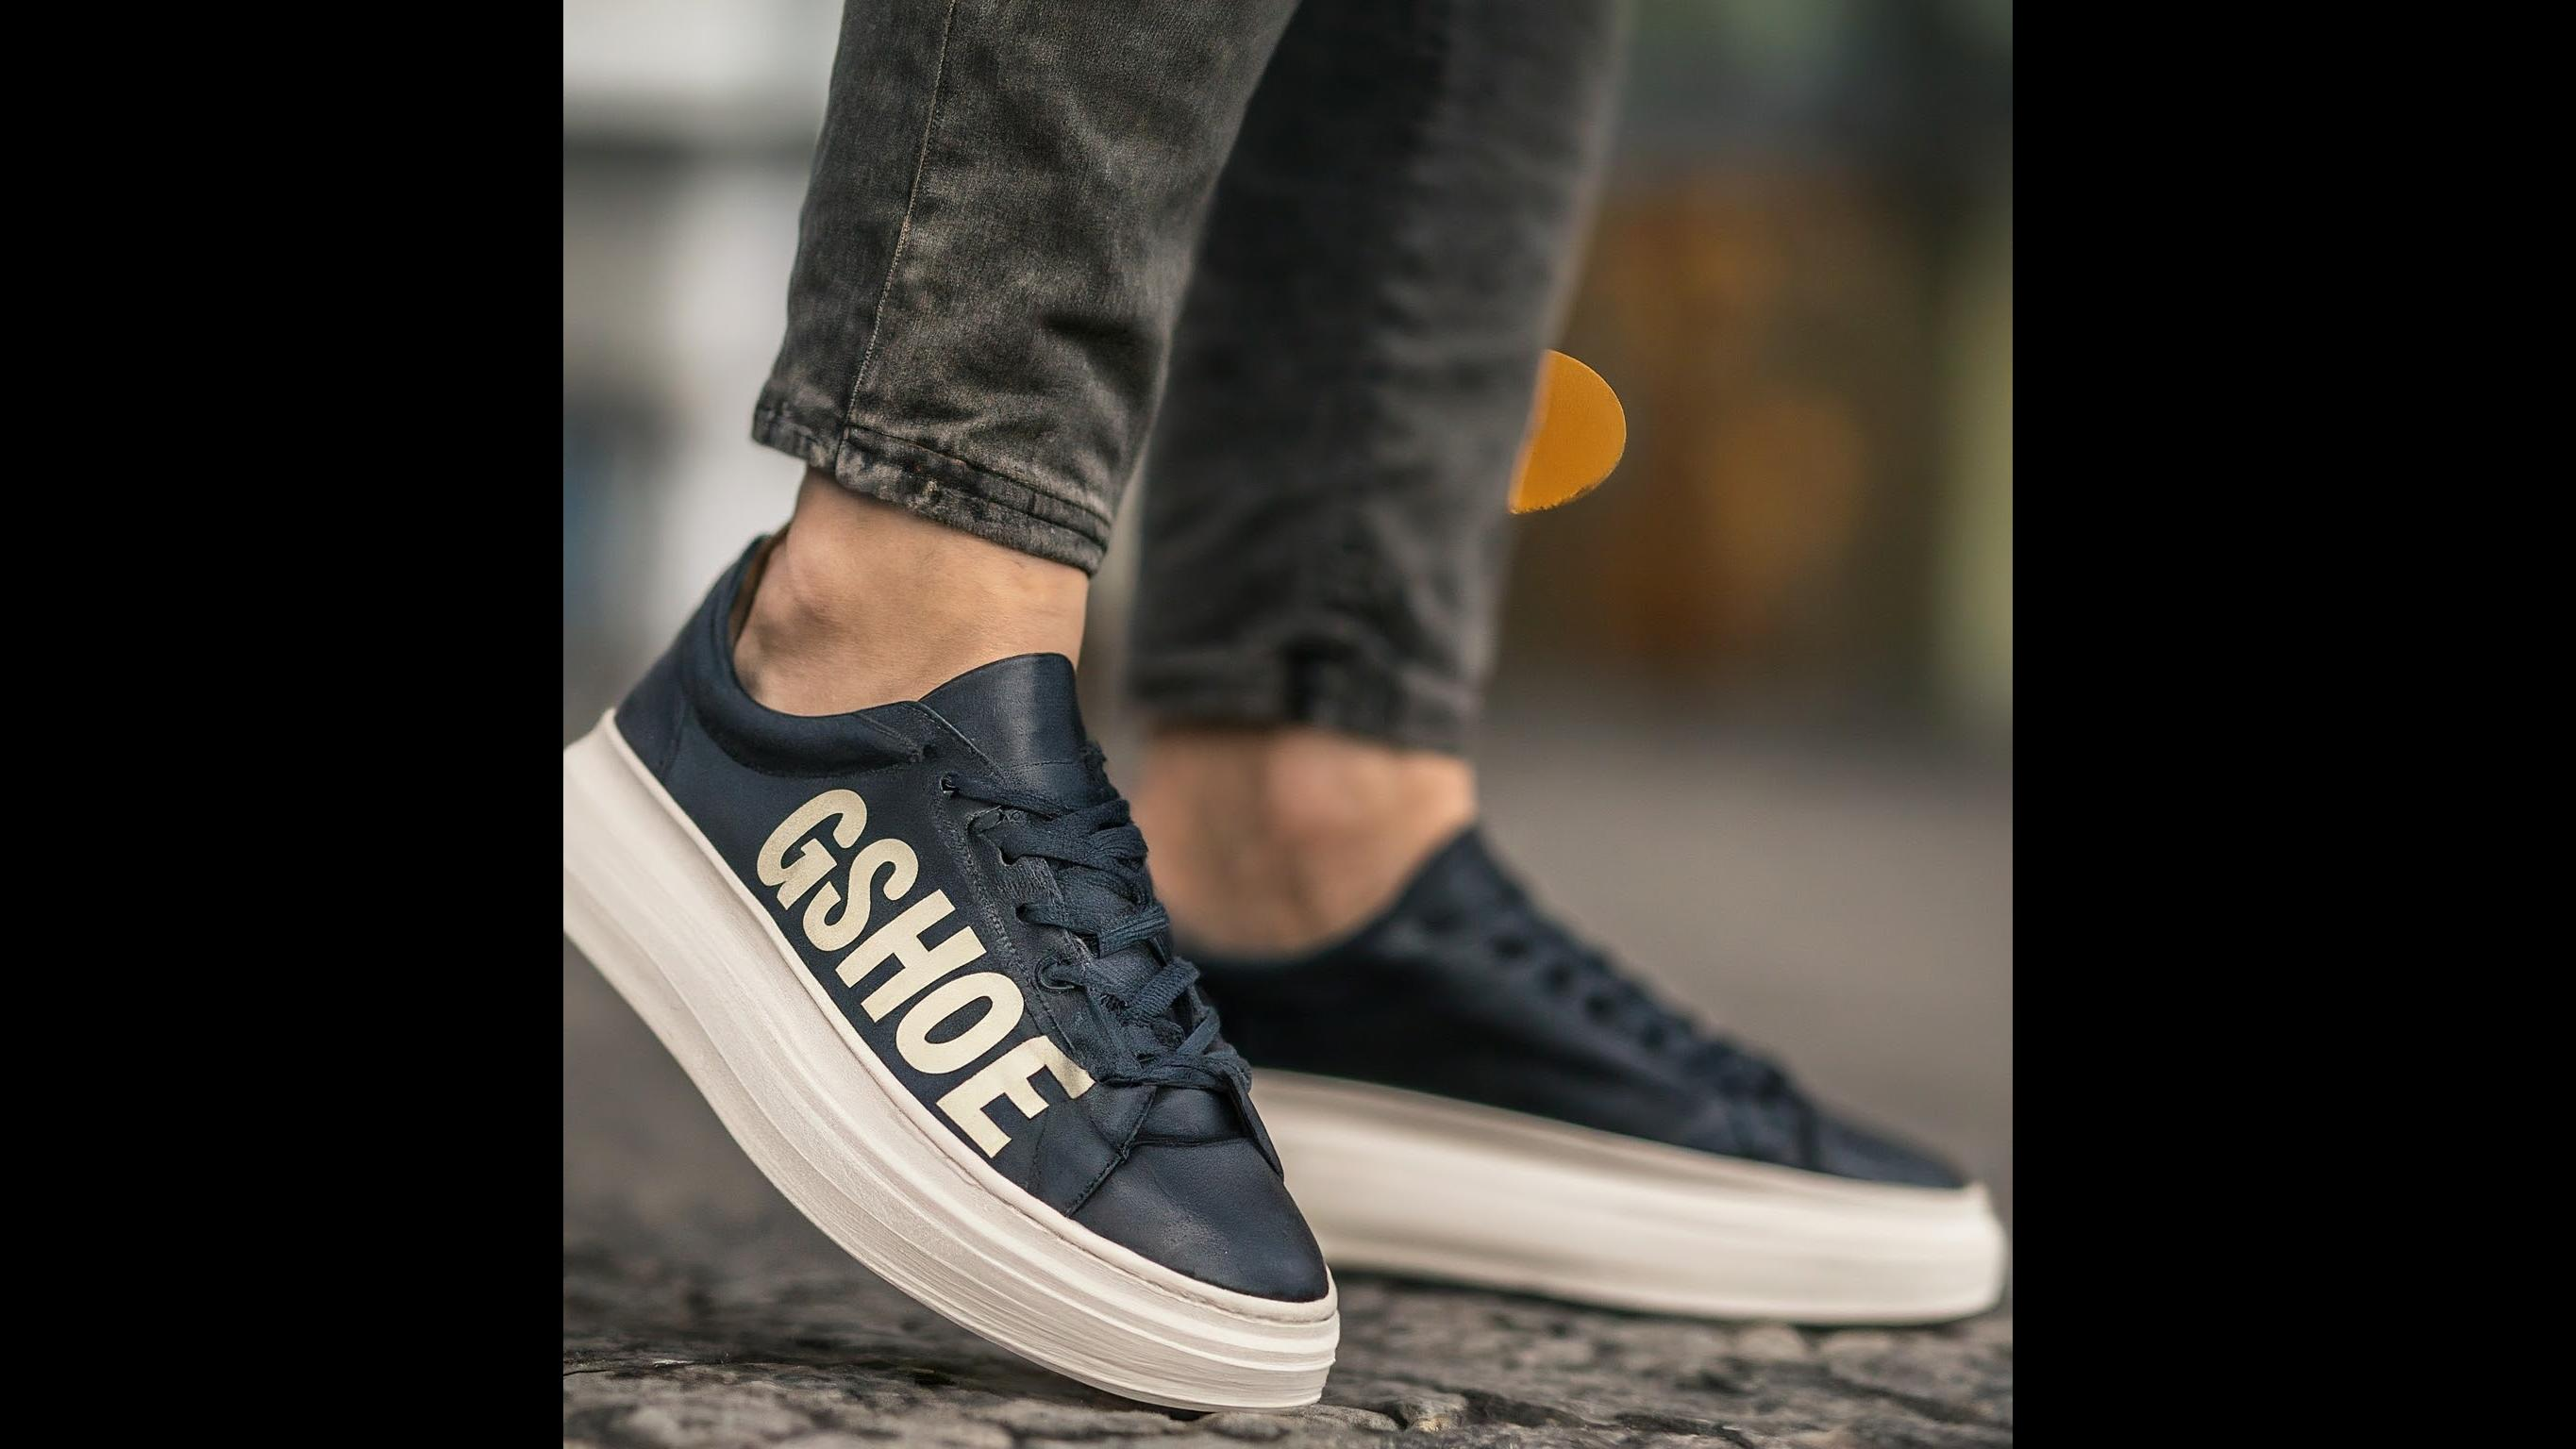

In [22]:
# show base image

base_img.show()

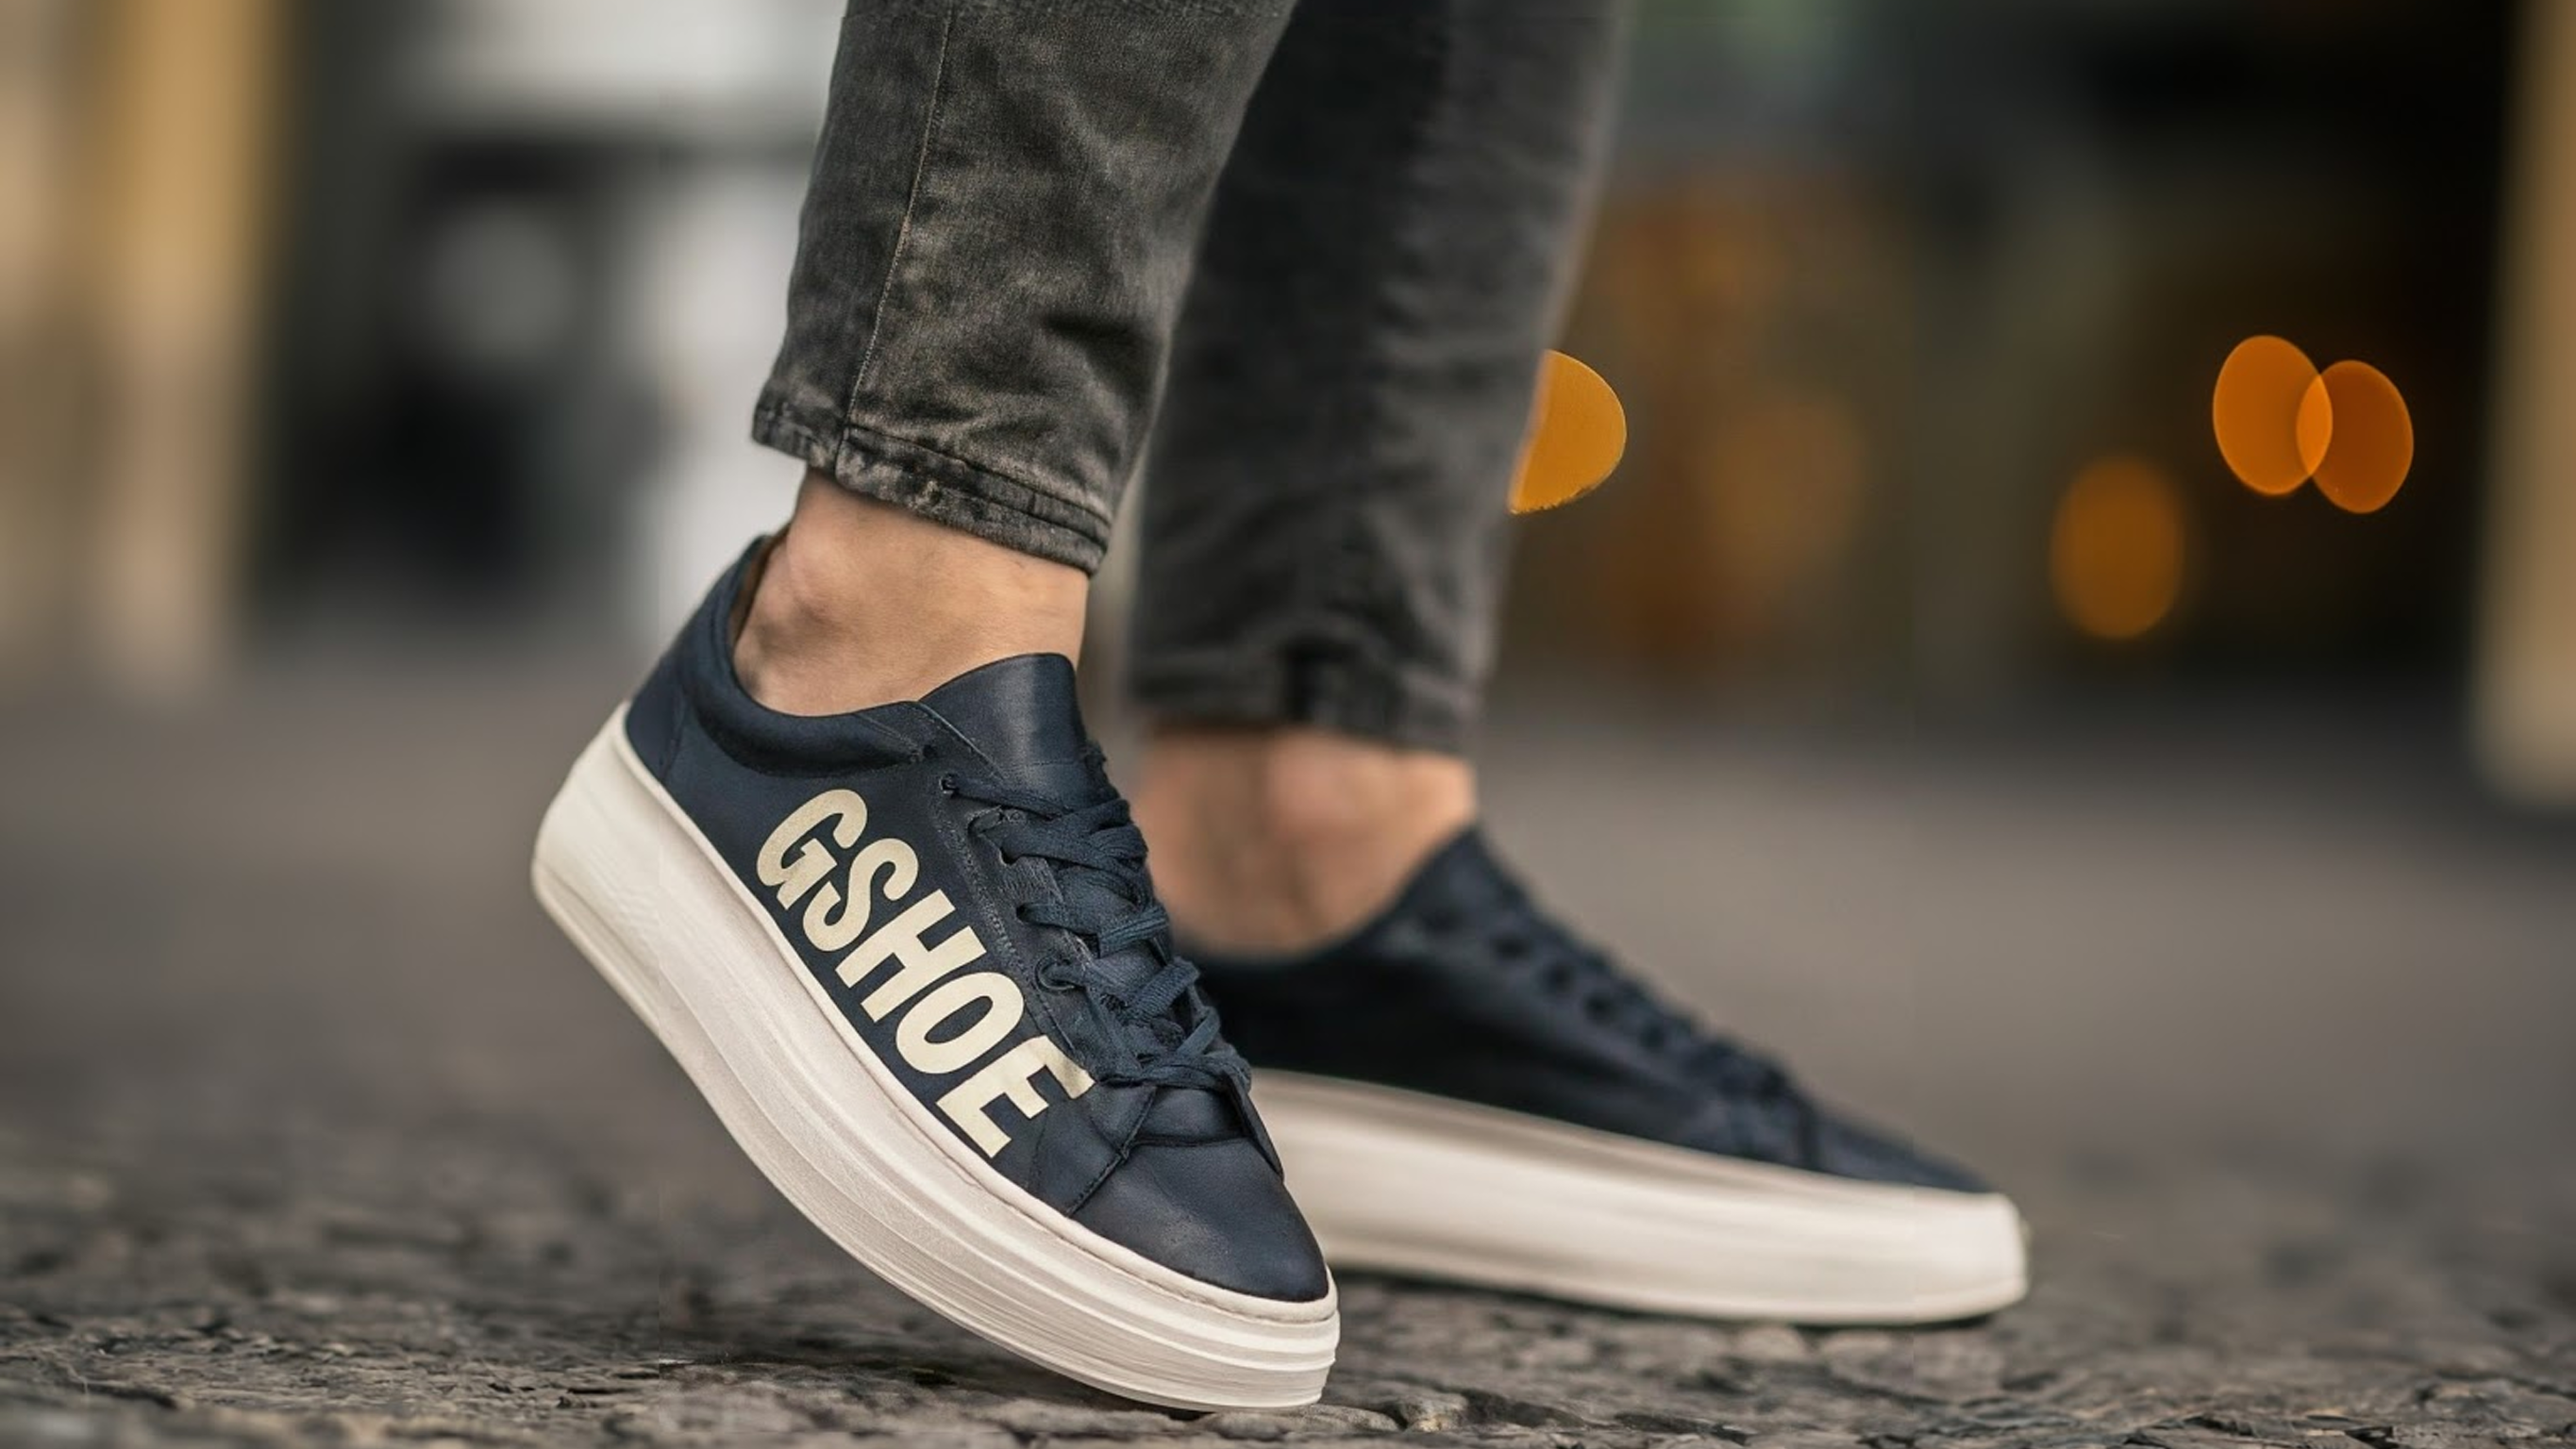

In [23]:
# expend to 16:9 using Imagen's outpainting feature

images = imagen_model.edit_image(
    base_image=base_img,
    mask=mask_img,
    edit_mode="outpainting",
    prompt="",
)

images[0].show()

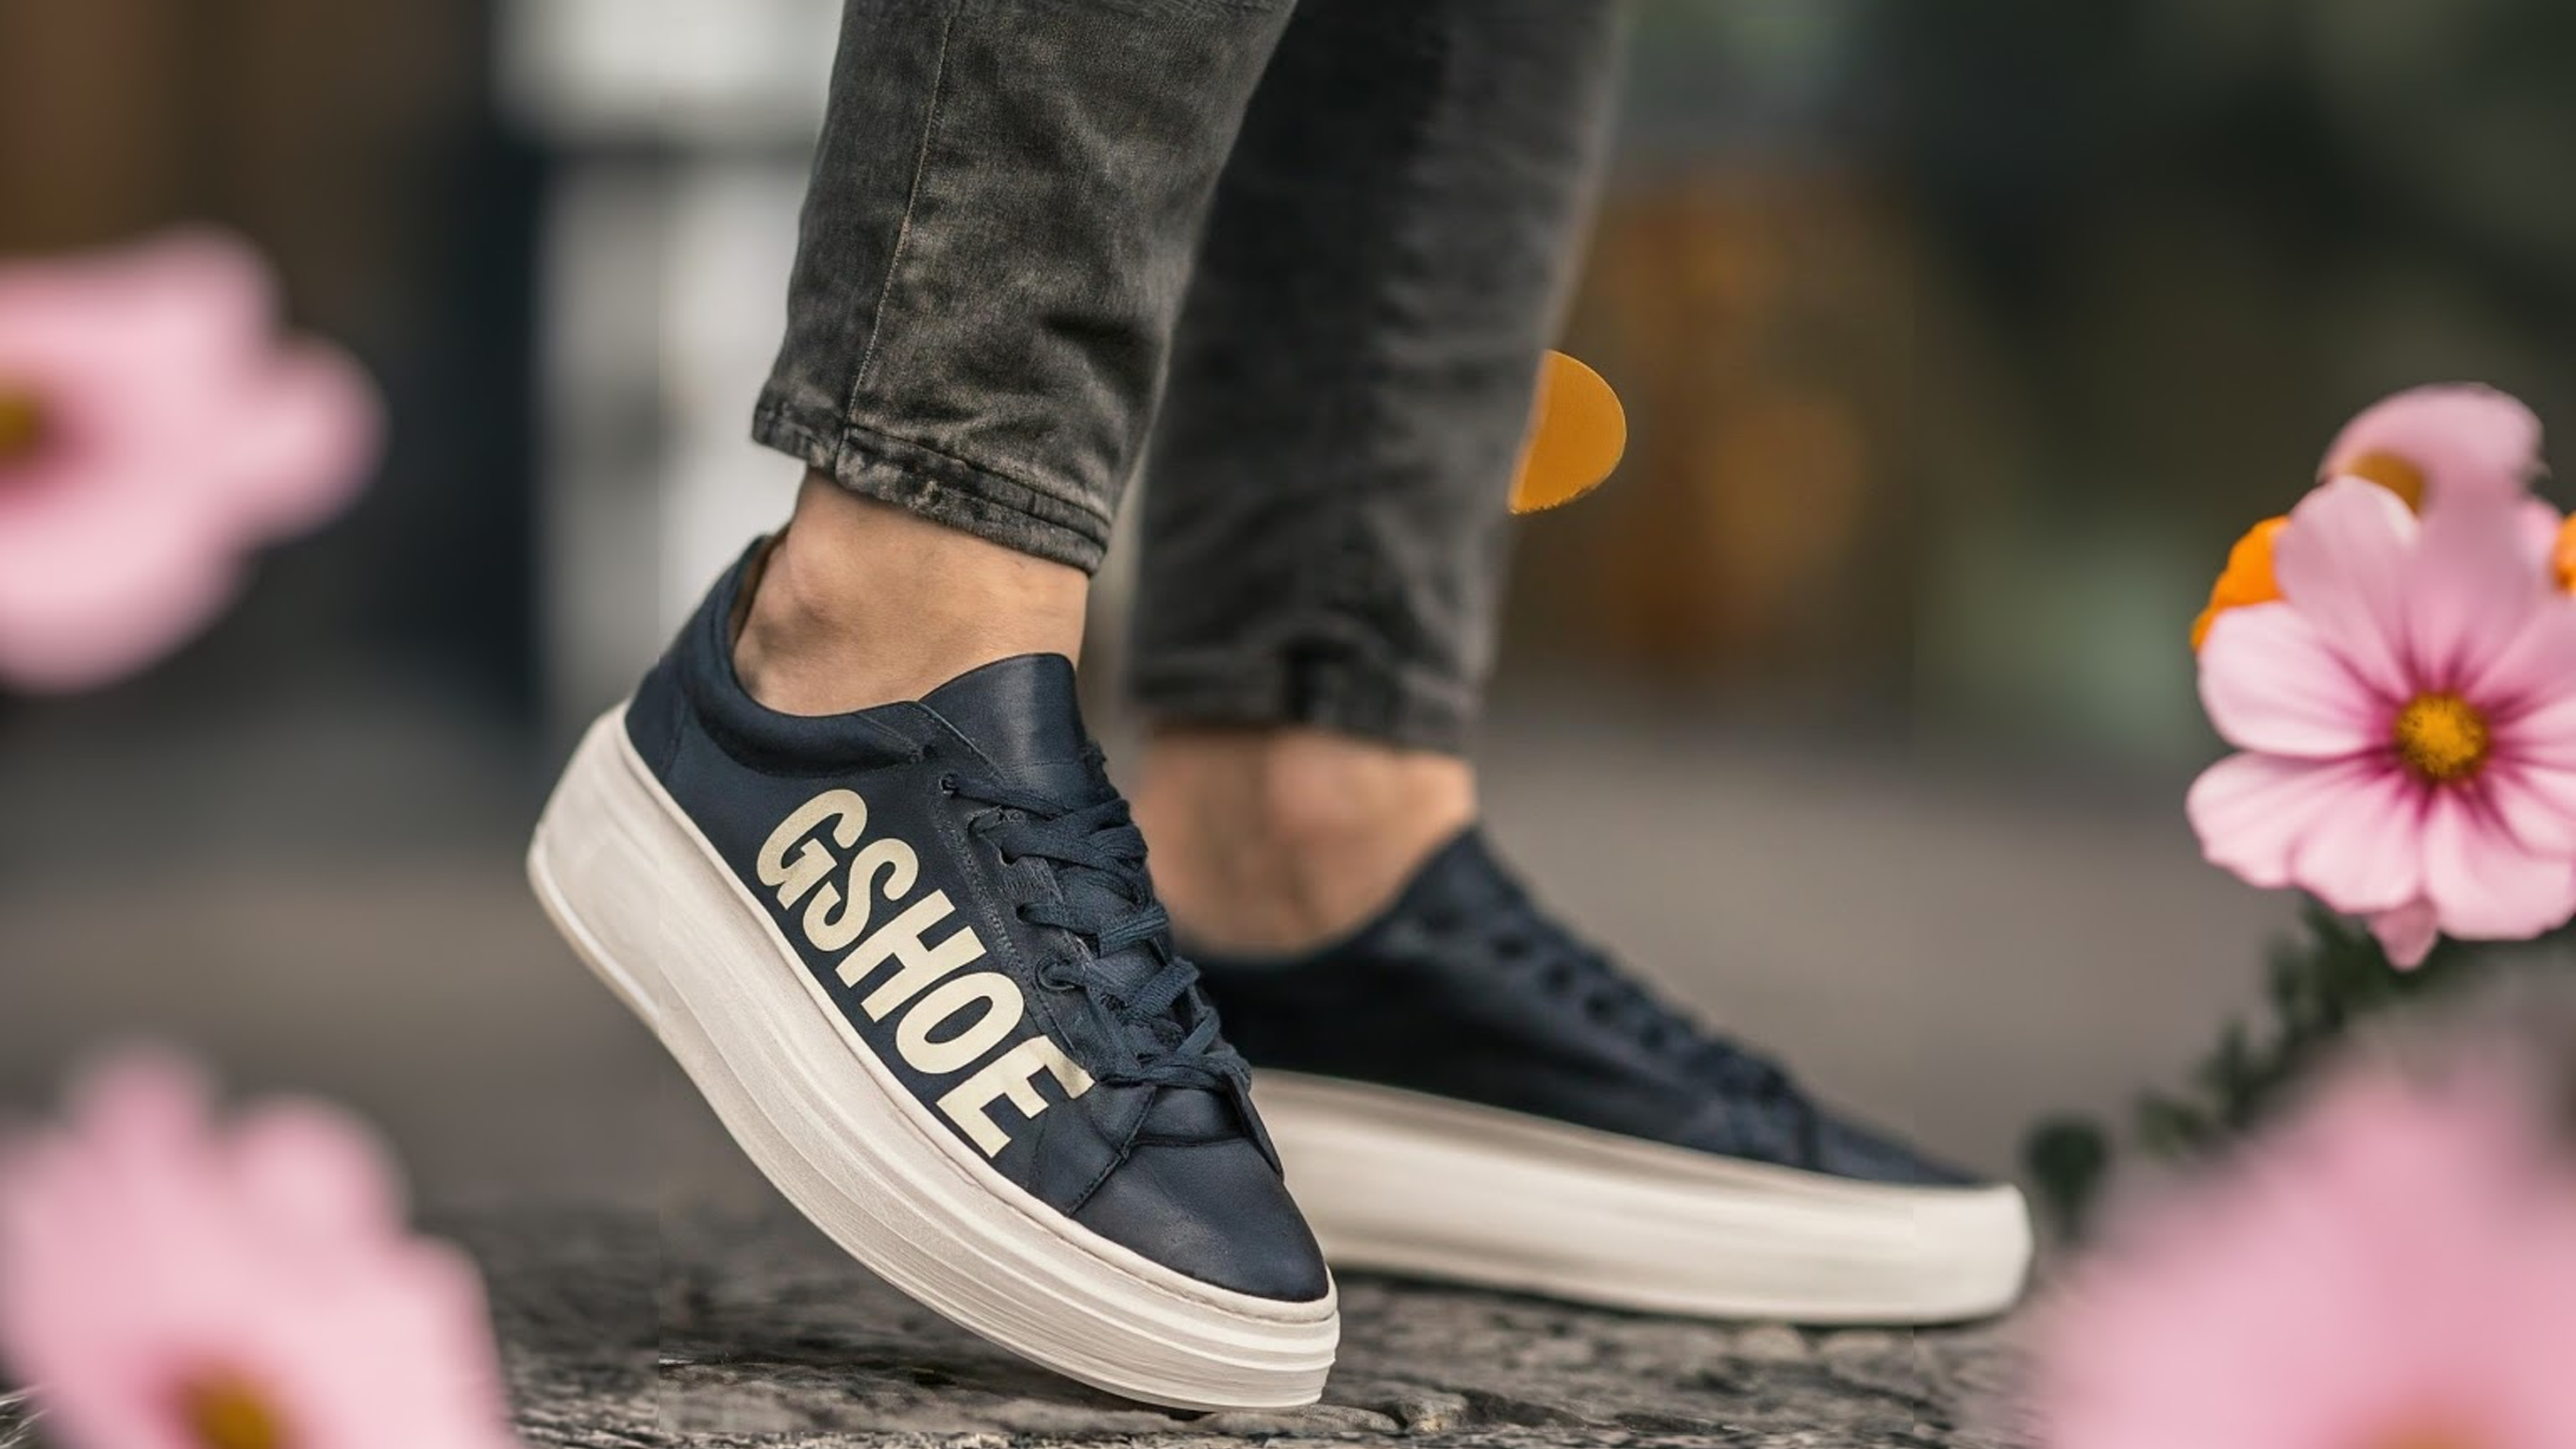

In [58]:
# expend to 16:9 using Imagen with a modifier prompt

images = imagen_model.edit_image(
    base_image=base_img,
    mask=mask_img,
    edit_mode="outpainting",
    prompt="a shoe surround by flowers",
)

images[0].show()

## Cleaning up

To avoid incurring charges to your Google Cloud account for the resources used in this notebook, follow these steps:

1. To avoid unnecessary Google Cloud charges, use the [Google Cloud console](https://console.cloud.google.com/) to delete your project if you do not need it. Learn more in the Google Cloud documentation for [managing and deleting your project](https://cloud.google.com/resource-manager/docs/creating-managing-projects).
1. If you used an existing Google Cloud project, delete the resources you created to avoid incurring charges to your account.
1. Disable the [Vertex AI API](https://console.cloud.google.com/apis/api/aiplatform.googleapis.com) in the Google Cloud Console.